## 数据集创建及初步清洗

In [40]:
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

In [2]:
def createTrainSet(readpath:str,savepath:str,labelfilepath:str="./data/train/outputs/主蒸汽流量.csv")->pd.DataFrame:
    """
    :param readpath: 存放各指标数据集的路径
    :param labelfilepath: 训练集label的存放位置(csv)
    :return DataFrame: 生成训练集/测试集(pandas DataFrame)
    """
    list_dfs = []
    for file in os.listdir(readpath):
        # 需将"时间"解析为日期格式
        df_onefile = pd.read_csv((readpath+file),encoding='utf-8',index_col=['时间'],parse_dates=['时间'])
        list_dfs.append(df_onefile)
    # 读取label
    df_labeloftrain = pd.read_csv(labelfilepath,encoding='utf-8',index_col=['时间'],parse_dates=['时间'])
    list_dfs.append(df_labeloftrain)

    # 水平连接(默认取的是'outer')
    df_train = pd.concat(objs=list_dfs,axis=1)
    df_train.to_csv(savepath,encoding = 'utf-8-sig',)

In [3]:
# 创建训练集
# createTrainSet('./data/train/inputs/',"./data/train/trainset.csv")

In [2]:
df_trainSet = pd.read_csv("./data/train/trainset.csv",encoding='utf-8-sig',index_col=['时间'],parse_dates=['时间'])
df_trainSet.info()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18304\1264403500.py:1: DtypeWarning: Columns (11,13,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trainSet = pd.read_csv("./data/train/trainset.csv",encoding='utf-8-sig',index_col=['时间'],parse_dates=['时间'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257400 entries, 2021-12-20 00:00:00 to 2021-12-22 23:29:59
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CO含量       257400 non-null  float64
 1   HCL含量      257400 non-null  float64
 2   NOx含量      257400 non-null  float64
 3   SO2含量      257400 non-null  float64
 4   一次风调门      257400 non-null  float64
 5   一次风量       257400 non-null  float64
 6   主蒸汽流量设定值   257400 non-null  float64
 7   二次风调门      257400 non-null  float64
 8   二次风量       257400 non-null  float64
 9   引风机转速      257400 non-null  float64
 10  推料器启停      257384 non-null  object 
 11  推料器手动指令    257400 non-null  float64
 12  推料器自动投退信号  257384 non-null  object 
 13  推料器自动指令    257400 non-null  float64
 14  氧量设定值      257400 non-null  float64
 15  汽包水位       257400 non-null  float64
 16  炉排启停       257384 non-null  object 
 17  炉排实际运行指令   257400 non-null  float64
 18  炉排手动指令     257400 non-null  fl

## 探索性数据分析

### 解决索引的唯一性(用于后续作图)

In [3]:
# 查找重复的索引
df_trainSet[df_trainSet.index.duplicated()]

,CO含量,HCL含量,NOx含量,SO2含量,一次风调门,一次风量,主蒸汽流量设定值,二次风调门,二次风量,引风机转速,...,推料器自动投退信号,推料器自动指令,氧量设定值,汽包水位,炉排启停,炉排实际运行指令,炉排手动指令,炉排自动投退信号,给水流量,主蒸汽流量
时间,,,,,,,,,,,,,,,,,,,,,
2021-12-21,0.5486,5.3009,86.3148,-0.0139,75.6250,69634.4844,60.0,21.7685,5612.4863,67.3542,...,True,79.7519,5.5,5.3795,False,49.7518,49.7514,True,69.1294,53.7712
2021-12-22,2.6667,2.3519,56.3889,4.8750,60.2407,65042.4258,60.0,19.6343,4330.1270,63.1296,...,True,60.0000,6.0,17.1928,False,60.0000,60.0000,True,77.0035,61.6909


In [4]:
sum(~df_trainSet.index.duplicated())

257398

In [5]:
# 去除重复索引()
df_trainSet = df_trainSet[~df_trainSet.index.duplicated()]

In [6]:
df_trainSet.index.shape

(257398,)

### 主蒸汽流量曲线

可以看出波动还是比较大的

<AxesSubplot:xlabel='时间', ylabel='主蒸汽流量'>

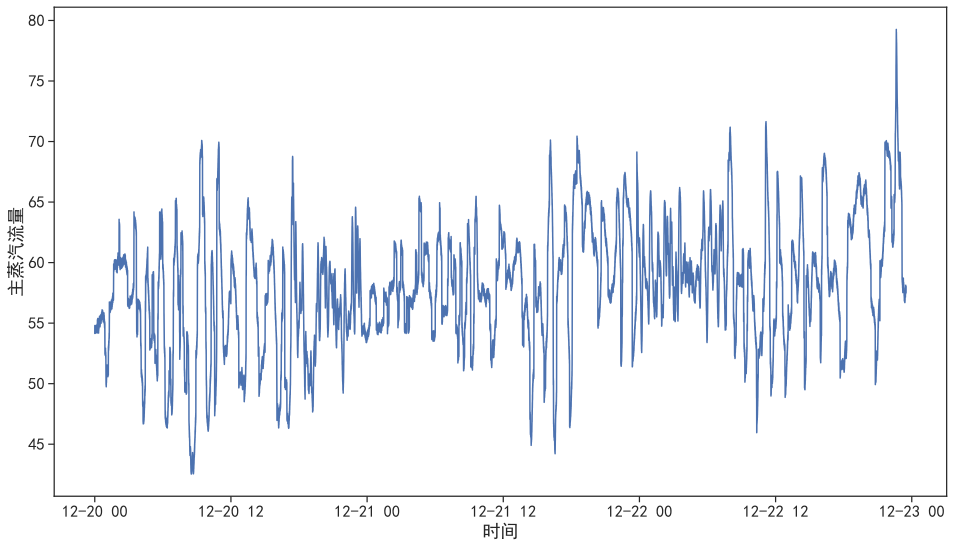

In [10]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(1,1,1)
sns.set_theme(style="white")
sns.set(context='notebook', style='ticks', font_scale=1.5,rc = {"font.weight":900,'font.sans-serif':['SimHei']})
sns.lineplot(x=df_trainSet.index,y=df_trainSet["主蒸汽流量"], linewidth=1.5,ax=ax1)
# ax1.set_ylim(0,0.08)
# ax1.set_xlabel('Time steps')
# ax1.set_ylabel('Absolute value of deviation')
# ax1.set_title('BiLSTM-ERROR',rc )

### 各维度数据的特征

In [11]:
df_trainSet.describe()

,CO含量,HCL含量,NOx含量,SO2含量,一次风调门,一次风量,主蒸汽流量设定值,二次风调门,二次风量,引风机转速,推料器手动指令,推料器自动指令,氧量设定值,汽包水位,炉排实际运行指令,炉排手动指令,给水流量,主蒸汽流量
count,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000,257398.000000
mean,3.006617,6.750722,64.268478,15.191759,74.595044,78918.051160,60.211712,24.525707,6255.662011,70.309520,65.254412,65.671106,6.201318,4.995819,50.637807,50.638502,73.661865,58.041419
std,15.044500,4.698083,14.453690,21.910244,10.529404,16030.204657,3.651101,17.042472,7525.248806,6.356195,13.990916,11.997825,2.359463,5.693235,10.598782,10.599538,6.538865,5.141198
min,-0.458100,0.407400,20.277800,-0.145800,24.997700,19971.271500,42.655200,9.685200,-0.000000,42.939800,30.000000,40.000000,2.882800,-27.986900,29.999800,30.000000,46.870300,42.536400
25%,0.736100,4.023100,54.611100,3.277800,70.553400,70147.445300,60.000000,19.650300,3354.102100,66.467600,55.000000,56.231900,5.500000,3.087725,40.000000,40.000000,69.970425,54.769525
50%,1.347200,5.736100,62.777800,6.784700,75.490700,77882.492200,60.000000,19.710600,4062.019000,69.754700,60.000000,61.534750,5.500000,4.954500,50.000000,50.000000,73.579750,58.095800
75%,2.194400,8.041700,71.722200,19.611100,80.631900,91782.687500,62.000000,20.838000,5196.152300,74.275500,74.727900,72.232925,6.000000,6.995050,57.972500,57.968600,77.542875,61.188500
max,300.208100,58.004600,134.537000,299.617800,100.023100,122637.046900,70.036100,89.979200,35791.058600,91.249800,100.000200,100.000200,25.000000,46.922300,100.000000,100.000000,100.297200,79.259500


In [16]:
df_trainSet.dtypes

CO含量         float64
HCL含量        float64
NOx含量        float64
SO2含量        float64
一次风调门        float64
一次风量         float64
主蒸汽流量设定值     float64
二次风调门        float64
二次风量         float64
引风机转速        float64
推料器启停         object
推料器手动指令      float64
推料器自动投退信号     object
推料器自动指令      float64
氧量设定值        float64
汽包水位         float64
炉排启停          object
炉排实际运行指令     float64
炉排手动指令       float64
炉排自动投退信号      object
给水流量         float64
主蒸汽流量        float64
dtype: object

In [14]:
df_trainSet.dtypes[ df_trainSet.dtypes == "object"]

推料器启停        object
推料器自动投退信号    object
炉排启停         object
炉排自动投退信号     object
dtype: object

In [17]:
# 列缺失情况
seq_null = df_trainSet.isnull().sum() 
# df_trainSet.columns[null_sum < len(df_trainSet) * 0.3]  
seq_null[seq_null>0].index

Index(['推料器启停', '推料器自动投退信号', '炉排启停', '炉排自动投退信号'], dtype='object')

In [20]:
df_trainSet[['推料器启停', '推料器自动投退信号', '炉排启停', '炉排自动投退信号']].tail(10)

,推料器启停,推料器自动投退信号,炉排启停,炉排自动投退信号
时间,,,,
2021-12-22 23:29:50,False,False,False,False
2021-12-22 23:29:51,False,False,False,False
2021-12-22 23:29:52,False,False,False,False
2021-12-22 23:29:53,False,False,False,False
2021-12-22 23:29:54,False,False,False,False
2021-12-22 23:29:55,False,False,False,False
2021-12-22 23:29:56,False,False,False,False
2021-12-22 23:29:57,False,False,False,False
2021-12-22 23:29:58,False,False,False,False


1. 缺失的值均来自于四个**非float**列
2. 四个非float列均为bool型数据

In [23]:
df_trainSet[['推料器启停', '推料器自动投退信号', '炉排启停', '炉排自动投退信号']].head(18)

,推料器启停,推料器自动投退信号,炉排启停,炉排自动投退信号
时间,,,,
2021-12-20 00:00:00,NaN,NaN,NaN,NaN
2021-12-20 00:00:01,NaN,NaN,NaN,NaN
2021-12-20 00:00:02,NaN,NaN,NaN,NaN
2021-12-20 00:00:03,NaN,NaN,NaN,NaN
2021-12-20 00:00:04,NaN,NaN,NaN,NaN
2021-12-20 00:00:05,NaN,NaN,NaN,NaN
2021-12-20 00:00:06,True,True,True,True
2021-12-20 00:00:07,True,True,True,True
2021-12-20 00:00:08,True,True,True,True


### float列的热力图

[Text(0, 0.5, 'CO含量'),
 Text(0, 1.5, 'HCL含量'),
 Text(0, 2.5, 'NOx含量'),
 Text(0, 3.5, 'SO2含量'),
 Text(0, 4.5, '一次风调门'),
 Text(0, 5.5, '一次风量'),
 Text(0, 6.5, '主蒸汽流量设定值'),
 Text(0, 7.5, '二次风调门'),
 Text(0, 8.5, '二次风量'),
 Text(0, 9.5, '引风机转速'),
 Text(0, 10.5, '推料器手动指令'),
 Text(0, 11.5, '推料器自动指令'),
 Text(0, 12.5, '氧量设定值'),
 Text(0, 13.5, '汽包水位'),
 Text(0, 14.5, '炉排实际运行指令'),
 Text(0, 15.5, '炉排手动指令'),
 Text(0, 16.5, '给水流量'),
 Text(0, 17.5, '主蒸汽流量')]

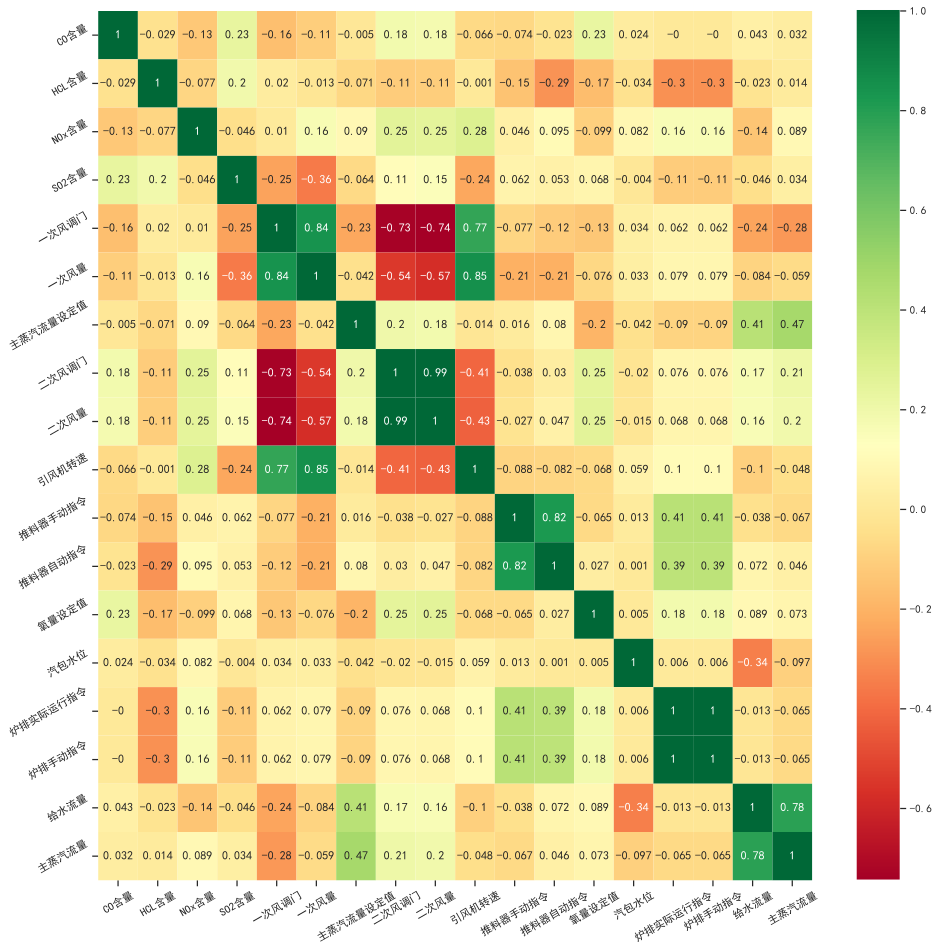

In [36]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(1,1,1)
columns = df_trainSet.columns[df_trainSet.dtypes == "float64"]
corr_trainSet = df_trainSet[columns].corr().round(3)
sns.set_theme(style="white")
sns.set(context='notebook', style='ticks', rc = {"font.weight":200,'font.sans-serif':['SimHei'],'axes.unicode_minus' : False})
sns.heatmap(corr_trainSet,annot=True,cmap='RdYlGn', ax=ax1, fmt=".2g")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
ax1.set_yticklabels(ax1.get_yticklabels(),rotation = 30)

1. 由热力图，其实看出主蒸汽流量主要由给水流量控制(高度线性相关)，其次与主蒸汽流量设定值相关
2. 与其余变量的线性相关性较弱

### bool列对于主蒸汽流量的影响

<AxesSubplot:xlabel='炉排自动投退信号', ylabel='主蒸汽流量'>

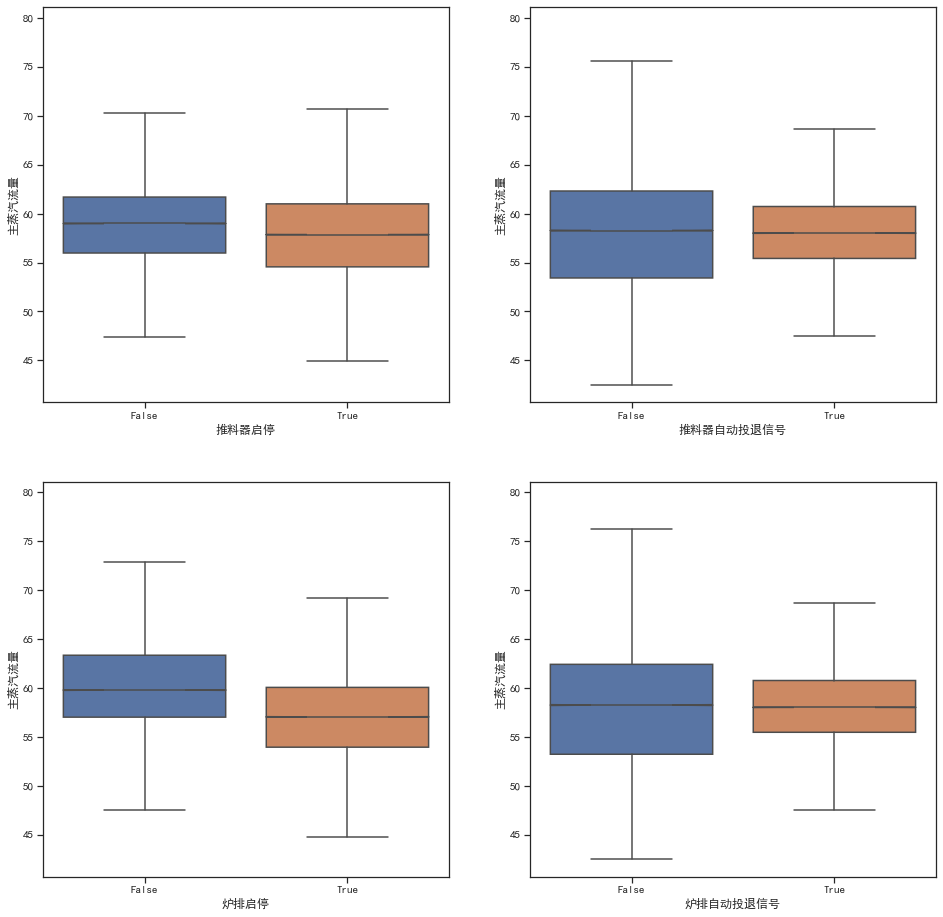

In [49]:
# '推料器启停', '推料器自动投退信号', '炉排启停', '炉排自动投退信号'
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.set_theme(style="white")
sns.set(context='notebook', style='ticks', rc = {"font.weight":200,'font.sans-serif':['SimHei'],'axes.unicode_minus' : False})
sns.boxplot(x='推料器启停', y='主蒸汽流量', notch=True, data=df_trainSet, fliersize=0,ax=ax1)
sns.boxplot(x='推料器自动投退信号', y='主蒸汽流量', data=df_trainSet, fliersize=0,ax=ax2,notch=True)
sns.boxplot(x='炉排启停', y='主蒸汽流量', data=df_trainSet, fliersize=0,ax=ax3,notch=True)
sns.boxplot(x='炉排自动投退信号', y='主蒸汽流量', data=df_trainSet, fliersize=0,ax=ax4,notch=True)

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

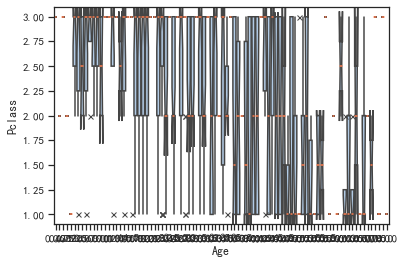

In [47]:
df = pd.read_csv("./train.csv")
sns.boxplot(
    data=df, x="Age", y="Pclass",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

## 一些测试

In [7]:
df1 = pd.read_csv("./data/train/inputs/CO含量.csv",encoding='utf-8',index_col=['时间'],parse_dates=['时间'])
df2 = pd.read_csv("./data/train/inputs/HCL含量.csv",encoding='utf-8',index_col=['时间'],parse_dates=['时间'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257400 entries, 2021-12-20 00:00:00 to 2021-12-22 23:29:59
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CO含量    257400 non-null  float64
dtypes: float64(1)
memory usage: 3.9 MB


In [10]:
# 查看各指标数据集的shape
for file in os.listdir("./data/train/inputs/"):
    df_onefile = pd.read_csv(("./data/train/inputs/"+file),encoding='utf-8',index_col=['时间'],parse_dates=['时间'])
    print(file+"'shape",df_onefile.shape,sep = ':',end='\n')

CO含量.csv'shape:(257400, 1)
HCL含量.csv'shape:(257400, 1)
NOx含量.csv'shape:(257400, 1)
SO2含量.csv'shape:(257400, 1)
一次风调门.csv'shape:(257400, 1)
一次风量.csv'shape:(257400, 1)
主蒸汽流量设定值.csv'shape:(257400, 1)
二次风调门.csv'shape:(257400, 1)
二次风量.csv'shape:(257400, 1)
引风机转速.csv'shape:(257400, 1)
推料器启停.csv'shape:(257382, 1)
推料器手动指令.csv'shape:(257400, 1)
推料器自动投退信号.csv'shape:(257382, 1)
推料器自动指令.csv'shape:(257400, 1)
氧量设定值.csv'shape:(257400, 1)
汽包水位.csv'shape:(257400, 1)
炉排启停.csv'shape:(257382, 1)
炉排实际运行指令.csv'shape:(257400, 1)
炉排手动指令.csv'shape:(257400, 1)
炉排自动投退信号.csv'shape:(257382, 1)
给水流量.csv'shape:(257400, 1)


In [15]:
# 以炉排自动投退信号和给水流量为例进行concat
df1 = pd.read_csv("./data/train/inputs/炉排自动投退信号.csv",encoding='utf-8',index_col=['时间'],parse_dates=['时间'])
df2 = pd.read_csv("./data/train/inputs/给水流量.csv",encoding='utf-8',index_col=['时间'],parse_dates=['时间'])

In [16]:
df3 = pd.concat([df1,df2],axis=1)

In [19]:
df3.apply(lambda x:sum(pd.notna(x)))

炉排自动投退信号    257384
给水流量        257400
dtype: int64

In [20]:
df3[pd.isna(df3['炉排自动投退信号'])]

,炉排自动投退信号,给水流量
时间,,
2021-12-20 00:00:00,NaN,73.4054
2021-12-20 00:00:01,NaN,73.5788
2021-12-20 00:00:02,NaN,73.7589
2021-12-20 00:00:03,NaN,73.9473
2021-12-20 00:00:04,NaN,74.1118
2021-12-20 00:00:05,NaN,74.2273
2021-12-21 00:00:01,NaN,69.2164
2021-12-21 00:00:02,NaN,69.3500
2021-12-21 00:00:03,NaN,69.4572
